In [15]:
import pandas as pd
import numpy as np
import json  # Para parsear .geo
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Nuevo: para Random Forest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Definir rangos de años
years = range(2000, 2025)  # De 2000 a 2024 inclusive

# Listas para acumular dataframes procesados
modis_list = []
no_incendios_list = []

# Loop para cargar y procesar modis (incendios positivos)
for year in years:
    modis_file = f'Incendios/modis_{year}_Peru.csv'
    if os.path.exists(modis_file):
        modis_df_year = pd.read_csv(modis_file)

        # Filtrar a región de San Martín
        san_martin_modis_year = modis_df_year[
            (modis_df_year['latitude'] >= -7.5) & (modis_df_year['latitude'] <= -5.5) &
            (modis_df_year['longitude'] >= -77.5) & (modis_df_year['longitude'] <= -75.5)
        ]

        # Agregar label
        san_martin_modis_year['incendio'] = 1

        # Seleccionar columnas relevantes
        san_martin_modis_year = san_martin_modis_year[['acq_date', 'latitude', 'longitude', 'incendio']]

        modis_list.append(san_martin_modis_year)
        print(f"Cargado y filtrado modis_{year}: {len(san_martin_modis_year)} registros")
    else:
        print(f"Archivo no encontrado: {modis_file}")

# Loop para cargar y procesar no_incendios (negativos)
for year in years:
    no_incendios_file = f'NoIncendios/puntos_sin_incendio_sanmartin_{year}.csv'
    if os.path.exists(no_incendios_file):
        no_incendios_df_year = pd.read_csv(no_incendios_file)

        # Parsear .geo para extraer lon y lat
        no_incendios_df_year['longitude'] = no_incendios_df_year['.geo'].apply(lambda x: json.loads(x)['coordinates'][0])
        no_incendios_df_year['latitude'] = no_incendios_df_year['.geo'].apply(lambda x: json.loads(x)['coordinates'][1])

        # Filtrar a región de San Martín
        no_incendios_df_year = no_incendios_df_year[
            (no_incendios_df_year['latitude'] >= -7.5) &
            (no_incendios_df_year['latitude'] <= -5.5) &
            (no_incendios_df_year['longitude'] >= -77.5) &
            (no_incendios_df_year['longitude'] <= -75.5)
        ]

        # Agregar label
        no_incendios_df_year['incendio'] = 0

        # Seleccionar columnas relevantes
        no_incendios_df_year = no_incendios_df_year[['acq_date', 'latitude', 'longitude', 'incendio']]

        no_incendios_list.append(no_incendios_df_year)
        print(f"Cargado no_incendios_{year}: {len(no_incendios_df_year)} registros")
    else:
        print(f"Archivo no encontrado: {no_incendios_file}")

# Combinar todos los dataframes
all_modis = pd.concat(modis_list, ignore_index=True) if modis_list else pd.DataFrame()
all_no_incendios = pd.concat(no_incendios_list, ignore_index=True) if no_incendios_list else pd.DataFrame()
full_df = pd.concat([all_modis, all_no_incendios], ignore_index=True)

# Ver totales
print(f"Total incendios: {len(all_modis)}")
print(f"Total no incendios: {len(all_no_incendios)}")
print(f"Dataset completo: {len(full_df)}")
full_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_martin_modis_year['incendio'] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_martin_modis_year['incendio'] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Cargado y filtrado modis_2000: 57 registros
Cargado y filtrado modis_2001: 68 registros
Cargado y filtrado modis_2002: 1395 registros
Cargado y filtrado modis_2003: 2873 registros
Cargado y filtrado modis_2004: 3027 registros
Cargado y filtrado modis_2005: 3463 registros
Cargado y filtrado modis_2006: 3037 registros
Cargado y filtrado modis_2007: 4313 registros
Cargado y filtrado modis_2008: 3014 registros
Cargado y filtrado modis_2009: 2402 registros


C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_martin_modis_year['incendio'] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_martin_modis_year['incendio'] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Cargado y filtrado modis_2010: 3765 registros
Cargado y filtrado modis_2011: 2474 registros
Cargado y filtrado modis_2012: 3326 registros
Cargado y filtrado modis_2013: 2412 registros
Cargado y filtrado modis_2014: 1574 registros
Cargado y filtrado modis_2015: 2211 registros
Cargado y filtrado modis_2016: 2848 registros
Cargado y filtrado modis_2017: 1328 registros


C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_martin_modis_year['incendio'] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  san_martin_modis_year['incendio'] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_4888\2606623599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

Cargado y filtrado modis_2018: 2032 registros
Cargado y filtrado modis_2019: 1781 registros
Cargado y filtrado modis_2020: 2034 registros
Cargado y filtrado modis_2021: 2199 registros
Cargado y filtrado modis_2022: 2609 registros
Cargado y filtrado modis_2023: 2177 registros
Cargado y filtrado modis_2024: 2599 registros
Cargado no_incendios_2000: 1657 registros
Cargado no_incendios_2001: 1659 registros
Cargado no_incendios_2002: 1555 registros
Cargado no_incendios_2003: 1437 registros
Cargado no_incendios_2004: 1441 registros
Cargado no_incendios_2005: 1402 registros
Cargado no_incendios_2006: 1444 registros
Cargado no_incendios_2007: 1364 registros
Cargado no_incendios_2008: 1442 registros
Cargado no_incendios_2009: 1473 registros
Cargado no_incendios_2010: 1404 registros
Cargado no_incendios_2011: 1469 registros
Cargado no_incendios_2012: 1434 registros
Cargado no_incendios_2013: 1479 registros
Cargado no_incendios_2014: 1532 registros
Cargado no_incendios_2015: 1486 registros
Cargad

,acq_date,latitude,longitude,incendio
0,2000-11-04,-5.8207,-77.3019,1
1,2000-11-05,-5.9875,-76.8958,1
2,2000-11-05,-5.9775,-76.9008,1
3,2000-11-05,-6.4761,-77.4836,1
4,2000-11-05,-6.4902,-77.4817,1


In [3]:
# Convertir acq_date a datetime
full_df['acq_date'] = pd.to_datetime(full_df['acq_date'], errors='coerce')

# Eliminar rows con fechas inválidas
full_df = full_df.dropna(subset=['acq_date'])

# Extraer features temporales
full_df['year'] = full_df['acq_date'].dt.year
full_df['month'] = full_df['acq_date'].dt.month
full_df['day'] = full_df['acq_date'].dt.day
full_df['day_of_year'] = full_df['acq_date'].dt.dayofyear

# Verificar
full_df.head()

,acq_date,latitude,longitude,incendio,year,month,day,day_of_year
0,2000-11-04,-5.8207,-77.3019,1,2000,11,4,309
1,2000-11-05,-5.9875,-76.8958,1,2000,11,5,310
2,2000-11-05,-5.9775,-76.9008,1,2000,11,5,310
3,2000-11-05,-6.4761,-77.4836,1,2000,11,5,310
4,2000-11-05,-6.4902,-77.4817,1,2000,11,5,310


In [4]:
features = ['latitude', 'longitude', 'month', 'day', 'day_of_year', 'year']
X = full_df[features]
y = full_df['incendio']

# Ver balance de clases
print(y.value_counts())

incendio
1    59018
0    37143
Name: count, dtype: int64


In [5]:
# Ordenar por fecha
full_df = full_df.sort_values('acq_date')

# Split temporal: train hasta 2021, test 2022-2024
train_df = full_df[full_df['year'] <= 2021]
test_df = full_df[full_df['year'] >= 2022]

X_train = train_df[features]
y_train = train_df['incendio']
X_test = test_df[features]
y_test = test_df['incendio']

print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

Train size: 84358, Test size: 11803


In [6]:
# Calcular scale_pos_weight para desbalance (más incendios)
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]) if len(y_train[y_train == 1]) > 0 else 1
print(f"Scale pos weight: {scale_pos_weight}")

Scale pos weight: 0.6338000890903105


In [7]:
# Crear modelo Random Forest
model = RandomForestClassifier(
    n_estimators=200,         # Puedes reducir el número de árboles (menos sobreajuste)
    max_depth=5,              # Profundidad menor = árboles más simples
    min_samples_split=5,      # Obliga a tener al menos 5 muestras para dividir un nodo
    min_samples_leaf=3,       # Evita hojas con 1 solo registro
    max_features='sqrt',      # Cada árbol usa sqrt(#features) → más diversidad
    random_state=42,
    class_weight='balanced'
)


# Entrenar
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

Accuracy: 0.797339659408625
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      4418
           1       0.86      0.81      0.83      7385

    accuracy                           0.80     11803
   macro avg       0.78      0.79      0.79     11803
weighted avg       0.80      0.80      0.80     11803



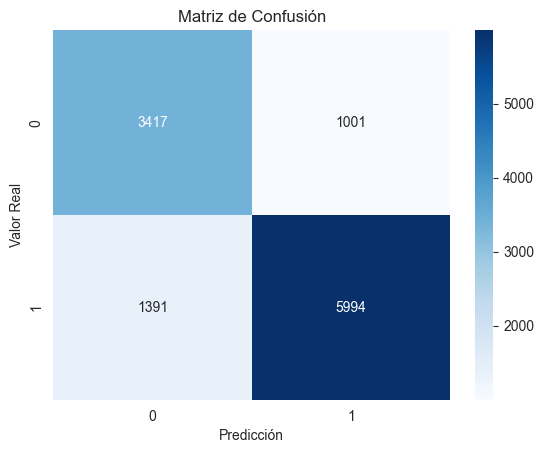


AUC Score: 0.8698
--- Curva ROC ---


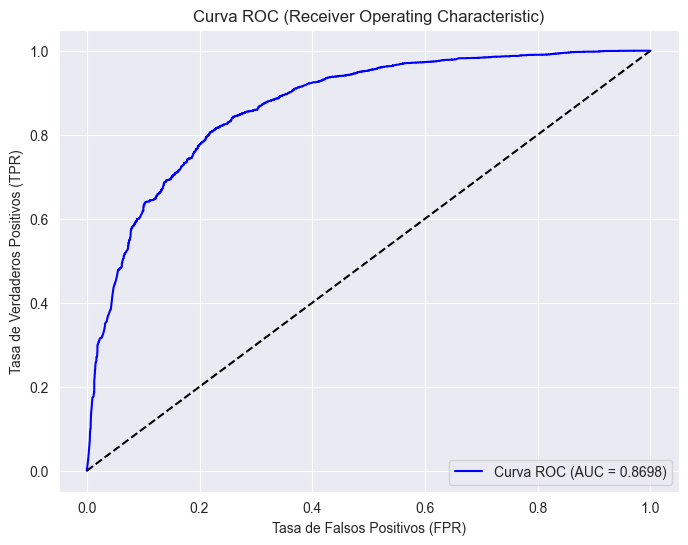

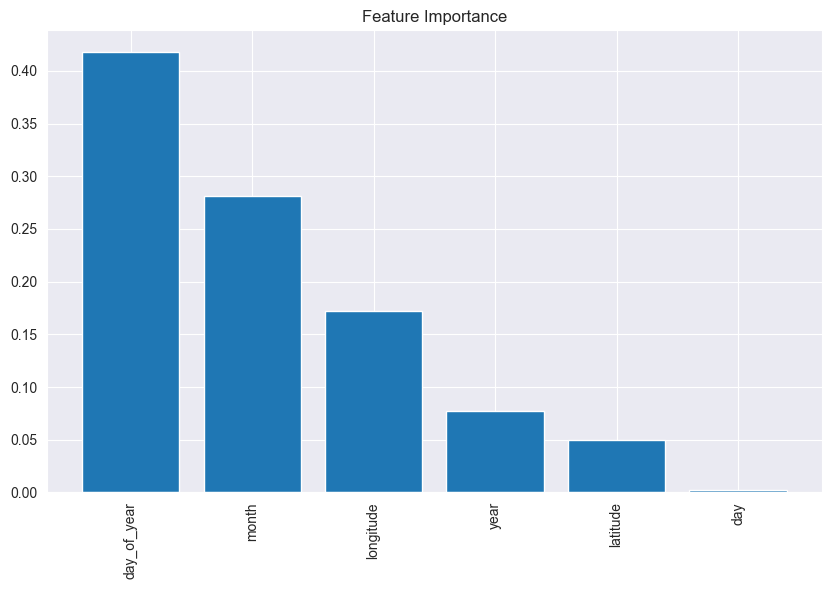

In [16]:
# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

# Curva ROC y Puntaje AUC

# 1. Obtener las probabilidades de predicción para la clase positiva (incendio=1)
# Usamos .predict_proba() que devuelve [prob_clase_0, prob_clase_1]
y_pred_proba = model.predict_proba(X_test)[:, 1]

# 2. Calcular el puntaje AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred_proba)
print(f'\nAUC Score: {auc:.4f}')

# 3. Calcular FPR (Tasa de Falsos Positivos) y TPR (Tasa de Verdaderos Positivos)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 4. Graficar la curva ROC
print("--- Curva ROC ---")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--') # Línea de referencia (azar)
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Feature importance (para Random Forest)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'random_forest_incendios_2000_2024.pkl')